# Integration, Interpolation, Curve Fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import *       # "quad" function

----
## Integration
* To numerically integrate a function: $I=\int_{x_{lo}}^{x_{hi}}f(x)dx$
    1. Define the function
    2. Set the integration bounds
    3. Call quad(f,xlo,xhi)
        a. quad returns two values, the result and the error.
    
#### Example

$$\int_0^13x^2+1dx = \left[x^3+x\right]_0^1 = 2$$

In [2]:
def f(x) :
    #print(x)
    return 3.0*x**2 + 1.0
xlo = 0
xhi = 1
I = quad(f, xlo, xhi)    

print("I     = ", I[0])
print("error = ", I[1])

I     =  2.0
error =  2.220446049250313e-14


There are a number of other parameters to fine tune the output and operation. Do "help(quad)" for details.

-----
## Interpolation

In [3]:
from scipy.interpolate import *     # "interp1d" function

* For interpolation, we have a series of data points at descrete locations.
* We want to estimate data points that are between the given points.
* We can **linearly interpolate** between our given function.
    * That is, between any two points, draw a straight line, and use the equation for the line to find intermediate values of the points.
* Or, we can use higher order (polynomial) interpolation functions to approximate the curve between data points. The most popular is the **cubic spline**.

To do interpolation:
* We have **x_given** x data and **y_given** corresponding y data.
* We create an interpolation function using the interp1d function. 
    * f_linear = interp1d(x_given,y_given).
* Then we can evaluate x anywhere between the bounds of the data using:
    * ```y_i = f_linear(x_i)```

**Example**

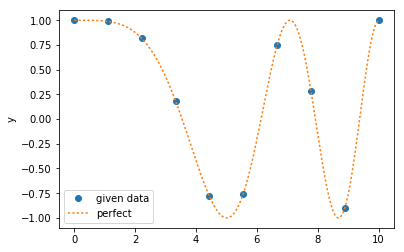

In [4]:
x_given = np.linspace(0,10,10)        # Interpolate between the given data
y_given = np.cos(x_given**2.0/8.0)    

xx      = np.linspace(0,10,1000)
yy      = np.cos(xx**2.0/8.0)
plt.plot(x_given,y_given,'o',label='given data')
plt.plot(xx,yy,':',label='perfect')
plt.ylabel('x')
plt.ylabel('y')
plt.legend(loc='best')

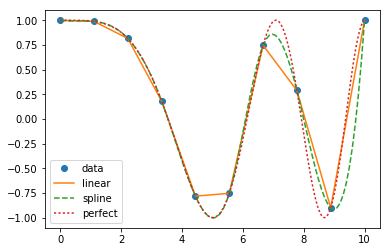

In [5]:
x_i     = np.linspace(0,10,100)       # interpolate to these points.

#------- Linear interpolation

f_linear = interp1d(x_given, y_given) # get an interpolation function
y_il     = f_linear(x_i)              # interpolate to y_i at x_i

#------- Spline interpolation

f_spline = interp1d(x_given, y_given, kind='cubic')
y_is     = f_spline(x_i)

#------- Plot the results

plt.plot(x_given,y_given,'o')
plt.plot(x_i, y_il, '-')
plt.plot(x_i, y_is, '--')
plt.plot(xx, yy, ':')
plt.legend(['data', 'linear', 'spline', 'perfect'], loc='best')

----
## Curve Fitting
### Polynomial fits

Curve fitting can be used for both interpolation, and for approximating a set of data with some approximate function.
* This is used a lot in fitting measured data to a model function, like kinetic rate data.

Use with ```p = np.polyfit(x, y, pOrder)``` and ```np.polyval(p, x)```
* Set your given x and y data
* Get a polyfit object
* Evaluate the polynomial using polyval

**Example**

[-0.16071429  0.50071429  0.22142857]


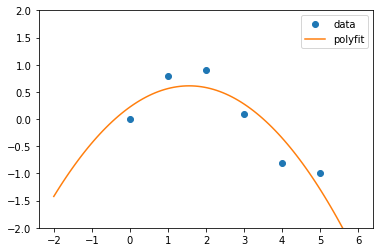

In [6]:
x_given = np.array([0., 1., 2., 3., 4., 5.])         # given x data
y_given = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])   # given y data

x_p = np.linspace(-2.0,6.0, 100)       # x data for plotting the poly fit

p3  = np.polyfit(x_given,y_given, 2)    # a polynomial object

y_p = np.polyval(p3, x_p)              # call polyval

def f(x,p):
    return p[0]*x**2 + p[1]*x + p[2]

plt.plot(x_given, y_given,   'o')
plt.plot(x_p,     f(x_p,p3),       '-')
plt.legend(['data', 'polyfit'], loc='best')
plt.ylim(-2,2)
print(p3)

Note, p3 has the coefficients of the polynomial, with the highest x power first.

In [7]:
print(p3)

[-0.16071429  0.50071429  0.22142857]


### General Curve Fits

We can fit a general function f(x; a, b, c) where f is a function of x with parameters a, b, c that we want to optimize for a set of given data.

Use ```curve_fit``` available from ```from scipy.optimize import *```

***Example from scipy.org:***
Fit function 
$$ f(x) = a\exp(-bx) + c$$

In [8]:
from scipy.optimize import *

2.4924217873534857 1.0296029155528463 0.37325303957491873


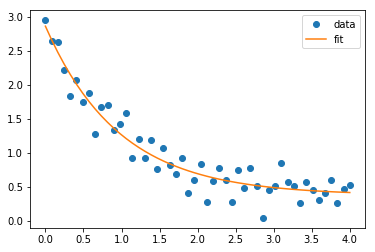

In [9]:
#-------- Define the function with parameters
def f(x, a, b, c) :     
    return a*np.exp(-b*x) + c

#-------- Set some given data
x_given = np.linspace(0,4,50)
y_given = f(x_given,2.5,1.3,0.5) + 0.2*np.random.normal(size=len(x_given))

#-------- Do the curve fit

params, extras = curve_fit(f, x_given, y_given)
#-------- Output / plot the results

a,b,c = params
print(a,b,c)

plt.plot(x_given, y_given, 'o')
plt.plot(x_given, f(x_given,a,b,c))
plt.legend(['data', 'fit'], loc='best')